In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Euler-Forward method

## Algorithm

a. Input
* **Vector Function:** $\mathbf{F}(x, \mathbf{Y})$ where $\mathbf{Y} \in \mathbb{R}^m$ is the state vector.
    * Returns derivative vector $[y'_1, y'_2, \dots, y'_m]$.
* **Initial Conditions:** Scalar $x_0$ and Vector $\mathbf{Y}_0$.
* **Interval:** $[x_0, X]$.
* **Number of steps:** $N$.

b. Output
* A sequence of vectors $\mathbf{Y}_j$ approximating the system solution at each grid point $x_j$.

c. Steps
1.  **Calculate Step Size:**
    $$h = \frac{X - x_0}{N}$$

2.  **Initialization:**
    Set $x_{curr} = x_0$
    Set $\mathbf{Y}_{curr} = \mathbf{Y}_0$ (Array of size $m$)

3.  **Iteration:**
    For $j = 0$ to $N-1$:
    * **Compute Derivative Vector:**
        $$\mathbf{D} = \mathbf{F}(x_{curr}, \mathbf{Y}_{curr})$$
    * **Update State Vector (Vectorized Addition):**
        $$\mathbf{Y}_{next} = \mathbf{Y}_{curr} + h \cdot \mathbf{D}$$
    * **Update Independent Variable:**
        $$x_{next} = x_{curr} + h$$
    * **Advance:**
        Set $x_{curr} = x_{next}, \mathbf{Y}_{curr} = \mathbf{Y}_{next}$



In [80]:

def euler_system_solver(F, x0, Y0, X_end, N):
    """
    Solves a system of Cauchy differential problems using Euler-Forward method.
    
    Parameters:
    F : function
        A vector function F(x, Y) that returns a numpy array of derivatives.
    x0 : float
        Initial value of x.
    Y0 : list or np.array
        Initial vector of values [y1_0, y2_0, ...].
    X_end : float
        The end value of x.
    N : int
        Number of steps.
        
    Returns:
    pd.DataFrame
        Table containing steps, x, and all solution components y_k.
    """
    
    # 1. Setup Step Size
    h = (X_end - x0) / N
    
    # 2. Initialize Vector State
    # Convert input list to numpy array for vector math
    Y_curr = np.array(Y0, dtype=float) 
    x_curr = x0
    
    # Prepare storage for results
    # We will store: Step, x, and then all components of Y
    results = []
    
    print(f"Input Parameters:\n x0 = {x0}, Y0 = {Y_curr}\n X_end = {X_end}, N = {N}")
    print(f"Calculated Step Size h = {h}\n")
    print("Iterating System...")
    
    # Store initial state (Step 0)
    # We create a dictionary for the row to easily handle dynamic columns
    row = {'Step': 0, 'x': x_curr}
    for i, val in enumerate(Y_curr):
        row[f'y_{i}'] = val
    results.append(row)
    
    # 3. Iteration Loop
    for j in range(N):
        # Calculate Derivative Vector: F(x, Y)
        # This returns a vector [y1', y2', ...]
        dY = np.array(F(x_curr, Y_curr))
        
        # Update Vector State: Y_{j+1} = Y_j + h * F(x_j, Y_j)
        Y_next = Y_curr + h * dY
        x_next = x_curr + h
        
        # Update current values for next loop
        Y_curr = Y_next
        x_curr = x_next
        
        # Store results
        row = {'Step': j + 1, 'x': x_curr}
        for i, val in enumerate(Y_curr):
            row[f'y_{i}'] = val
        results.append(row)

    # 4. Create Output Table
    df_result = pd.DataFrame(results)
    return df_result

## Result

In [81]:
# --- Usage Example: System of Equations ---

def system_derivatives(x, Y):
    y0 = Y[0] # This is y
    y1 = Y[1] # This is z
    
    dy0 = 0.5*y0*(1-y0) - 0.15*y0*y1       
    dy1 = -0.3*y1 + 0.2*y0*y1     
    
    return [dy0, dy1]

# Parameters
x_start = 0
Y_start = [0.7, 0.5]  # y(0)=0.7, z(0)=0.5
x_stop = 2000
steps = 20000

In [82]:
 # Run Solver
df_system = euler_system_solver(system_derivatives, x_start, Y_start, x_stop, steps)

# Display Result
df_system

Input Parameters:
 x0 = 0, Y0 = [0.7 0.5]
 X_end = 2000, N = 20000
Calculated Step Size h = 0.1

Iterating System...


,Step,x,y_0,y_1
0,0,0.0,0.700000,5.000000e-01
1,1,0.1,0.705250,4.920000e-01
2,2,0.2,0.710439,4.841797e-01
3,3,0.3,0.715565,4.765339e-01
4,4,0.4,0.720627,4.690577e-01
...,...,...,...,...
19996,19996,1999.6,1.000000,1.784535e-88
19997,19997,1999.7,1.000000,1.766690e-88
19998,19998,1999.8,1.000000,1.749023e-88
19999,19999,1999.9,1.000000,1.731533e-88


## Visualize

In [83]:
def plot_solver_result(df, mode, col1='x', col2='y_0', output_file='plot.png'):
    """
    Visualizes the solver output.
    
    Parameters:
    df : pd.DataFrame
        The solution table.
    mode : int
        1 for Time Series (x vs y).
        2 for Phase Plot (y_i vs y_j).
    col1 : str
        Name of the column for the X-axis.
    col2 : str
        Name of the column for the Y-axis.
    output_file : str
        Filename to save the image.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot Logic
    plt.plot(df[col1], df[col2], label=f'{col2} vs {col1}', color='navy', linewidth=2)
    
    # Formatting
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlabel(col1, fontsize=12)
    plt.ylabel(col2, fontsize=12)
    plt.legend()
    
    if mode == 1:
        # Set the axis limits manually
        plt.xlim(-10, 2000)       # Set x-axis range from 0 to 8
        #plt.ylim(-1.2, 1.2)  # Set y-axis range from -1.2 to 1.2

        plt.title(f"Mode 1: Time Series Plot ({col1} vs {col2})", fontsize=14)

    elif mode == 2:
        # Set the axis limits manually
        #plt.xlim(-10, 250)       # Set x-axis range from 0 to 8
        #plt.ylim(-1.2, 1.2)  # Set y-axis range from -1.2 to 1.2

        plt.title(f"Mode 2: Phase Plane Plot ({col1} vs {col2})", fontsize=14)

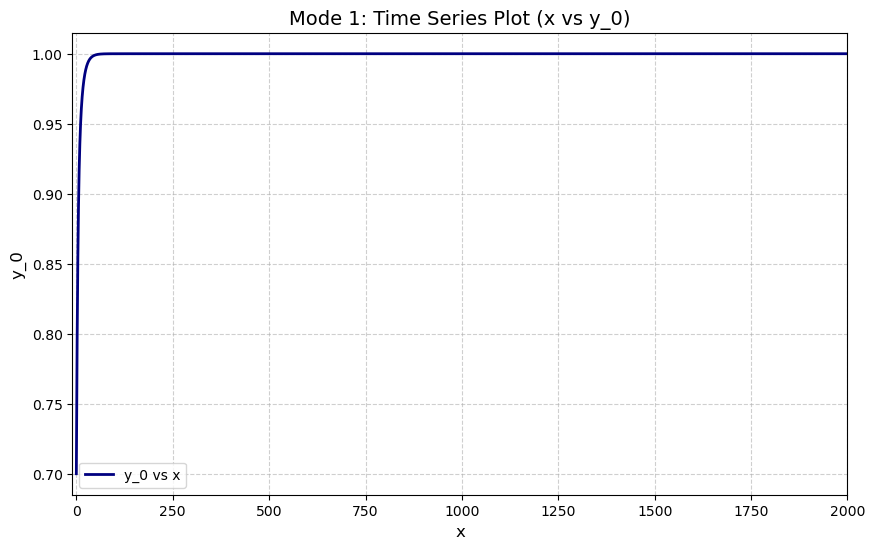

In [84]:
# 2. Plot Mode 1: x vs y_0 (Time vs Position)
plot_solver_result(df_system, mode=1, col1='x', col2='y_0')


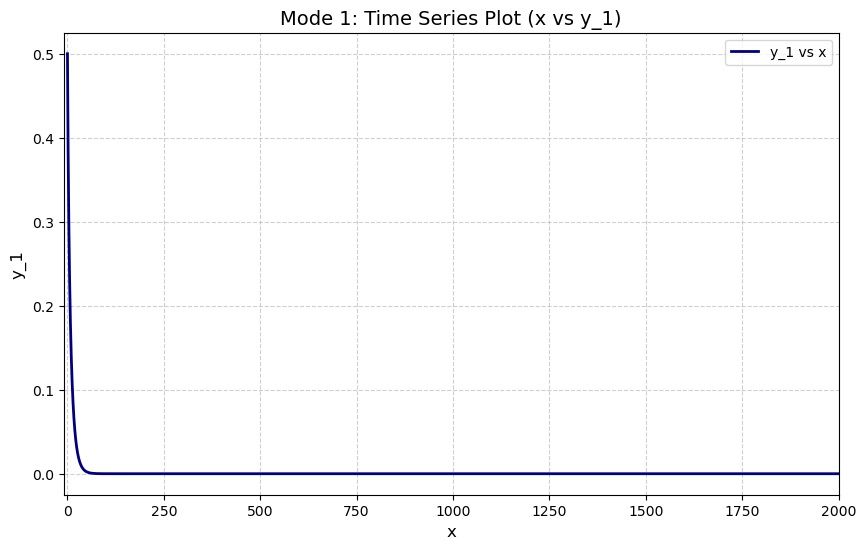

In [85]:
plot_solver_result(df_system, mode=1, col1='x', col2='y_1')

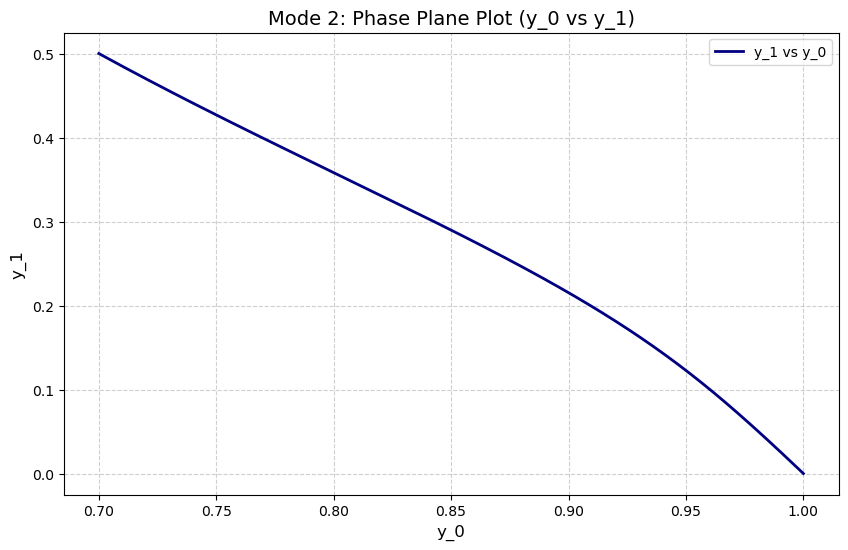

In [86]:
# 3. Plot Mode 2: y_0 vs y_1 (Position vs Velocity)
plot_solver_result(df_system, mode=2, col1='y_0', col2='y_1')

# Higher-variant

a. Input
* **Highest Derivative Function:** $f(t, y, y', \dots, y^{(k)})$ where the problem is $y^{(k+1)} = f$.
* **Initial Vector:** $\mathbf{Y}_0 = [y(t_0), y'(t_0), \dots, y^{(k)}(t_0)]$.
* **Interval:** $[t_0, T]$.
* **Step count:** $N$.

b. Output
* A table where:
    * Column `y_deriv_0` is the solution $y(t)$.
    * Column `y_deriv_1` is the first derivative $y'(t)$.
    * ...
    * Column `y_deriv_k` is the $k$-th derivative $y^{(k)}(t)$.

c. Transformation (Reduction)
Construct a vector function $\mathbf{F}(t, \mathbf{Y})$ where $\mathbf{Y} \in \mathbb{R}^{k+1}$:
$
\mathbf{F}(t, \mathbf{Y}) = 
\begin{bmatrix} 
\mathbf{Y}[1] \\ 
\mathbf{Y}[2] \\ 
\vdots \\ 
\mathbf{Y}[k] \\ 
f(t, \mathbf{Y}[0], \mathbf{Y}[1], \dots, \mathbf{Y}[k]) 
\end{bmatrix}
$

d. Steps
1.  **Initialize:**
    * Set $t_{curr} = t_0$
    * Set $\mathbf{Y}_{curr} = \mathbf{Y}_0$
    * Calculate $h = (T - t_0)/N$

2.  **Iteration:**
    For $j = 0$ to $N-1$:
    * **Evaluate Derivatives:**
        Compute $\mathbf{D} = \mathbf{F}(t_{curr}, \mathbf{Y}_{curr})$
        *(Note: The first $k$ elements of $\mathbf{D}$ are just copies of the last $k$ elements of $\mathbf{Y}_{curr}$)*
    * **Update State:**
        $\mathbf{Y}_{next} = \mathbf{Y}_{curr} + h \cdot \mathbf{D}$
    * **Update Time:**
        $t_{next} = t_{curr} + h$
    * **Assign:**
        $\mathbf{Y}_{curr} \leftarrow \mathbf{Y}_{next}$



In [87]:
def solve_higher_order_euler(func_highest_deriv, t0, initial_conditions, t_end, N):
    """
    Solves a single y^(n) = f(...) problem by converting it to a system.
    
    Parameters:
    func_highest_deriv : function
        The function f(t, Y_vector) that returns only the value of the highest derivative.
        Y_vector contains [y, y', y'', ... y^(n-1)]
    t0 : float
        Start time
    initial_conditions : list
        Values [y(t0), y'(t0), ..., y^(n-1)(t0)]
    t_end : float
        End time
    N : int
        Steps
    """
    
    order = len(initial_conditions)
    print(f"Detecting Order-{order} Differential Equation.")
    print(f"Reducing to system of {order} first-order equations...")

    # Define the System Vector Function F(t, Y)
    # This automatically maps y -> y', y' -> y'', ..., y^(n-1) -> func(...)
    def system_wrapper(t, Y):
        # Y is [y, y', y'', ..., y^(n-1)]
        
        dY_dt = np.zeros(order)
        
        # Fill standard reduction steps: y[i]' = y[i+1]
        # Example: if order 3: dY[0] = Y[1], dY[1] = Y[2]
        for i in range(order - 1):
            dY_dt[i] = Y[i+1]
            
        # The final derivative is determined by the specific physics/math function
        dY_dt[order - 1] = func_highest_deriv(t, Y)
        
        return dY_dt

    # Call the generic system solver
    return euler_system_solver(system_wrapper, t0, initial_conditions, t_end, N)

In [88]:
# --- Usage Example: ---

def highord_equation(t, Y):
    # Unpack state vector
    y0 = Y[0]      # y
    y1 = Y[1] # y'
    y2 = (t+y0)*np.cos(1+y1)
    return y2

# Parameters
t_start = 0
t_stop = 20
steps = 200
# Initial conditions: y(0) = 1, y'(0) = -1
init_conds = [1.0, -1.0]

In [89]:
# Run
df_result = solve_higher_order_euler(highord_equation, t_start, init_conds, t_stop, steps)

# Display
print("\nOutput Table:")
df_result

Detecting Order-2 Differential Equation.
Reducing to system of 2 first-order equations...
Input Parameters:
 x0 = 0, Y0 = [ 1. -1.]
 X_end = 20, N = 200
Calculated Step Size h = 0.1

Iterating System...

Output Table:


,Step,x,y_0,y_1
0,0,0.0,1.000000,-1.000000
1,1,0.1,0.900000,-0.900000
2,2,0.2,0.810000,-0.800500
3,3,0.3,0.729950,-0.701503
4,4,0.4,0.659800,-0.603062
...,...,...,...,...
196,196,19.6,10.721303,0.570796
197,197,19.7,10.778382,0.570796
198,198,19.8,10.835462,0.570797
199,199,19.9,10.892542,0.570795
